In [268]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import special_ortho_group
import seaborn as sns
import pandas as pd

# Goal 
To generate data (6 distinct groups) with trajectory in time

data_structure = [[n_1 data], [n_2 data]]

In [269]:
# c = number of class
# t = timepoints
# d = dimention of data
# a = amplitude

c = 6
t = 1000
d = 2
to_d = 10
a = 1

In [270]:
theta = np.linspace(0, 2*np.pi, c+1)
theta = theta[:-1]
theta


array([0.        , 1.04719755, 2.0943951 , 3.14159265, 4.1887902 ,
       5.23598776])

In [271]:
def find_coords(theta, class_num):
    x = a * np.cos(theta[class_num])
    y = a * np.sin(theta[class_num])
    return [x, y]

def transformation_to_n_dim(data, from_d, to_d):
    new_data = np.zeros((data.shape[0], to_d, data.shape[2]))

    for i in range(data.shape[0]):
        for j in range(data.shape[2]):
            # print(data[i, :, j].shape)
            new_data[i, :, j] = np.hstack((data[i, :, j], np.zeros(to_d - from_d)))
    
    return new_data

def rotation(data, seed = 42, d = to_d):
    random_rotated = np.zeros((data.shape[0], to_d, data.shape[2]))
    random_rotation_matrix = special_ortho_group.rvs(to_d)
    for i in range(data.shape[0]):
        for j in range(data.shape[2]):
            random_rotated[i, :, j] = np.matmul(data[i, :, j], random_rotation_matrix)

    return random_rotated

def rotation_matrix(matrix, degree):
    deg = np.radians(degree)
    rotation_operation = np.array([[np.cos(deg), -np.sin(deg)], [np.sin(deg), np.cos(deg)]])
    product = rotation_operation @ matrix
    return product

In [272]:
data = np.zeros((c, d, t))

In [273]:
# Initial location
for i in range(c):
    data[i, :, 0] = find_coords(theta, i)
    print(find_coords(theta, i))    

[np.float64(1.0), np.float64(0.0)]
[np.float64(0.5000000000000001), np.float64(0.8660254037844386)]
[np.float64(-0.49999999999999983), np.float64(0.8660254037844387)]
[np.float64(-1.0), np.float64(1.2246467991473532e-16)]
[np.float64(-0.5000000000000004), np.float64(-0.8660254037844384)]
[np.float64(0.49999999999999933), np.float64(-0.866025403784439)]


In [274]:
for i in range(t):
    if i == 0:
        continue
    for j in range(c):
        data[j, :, i] = rotation_matrix(data[j, :, i-1], 1) + np.random.normal(0, 0.01, (1, d))

Text(0.5, 0, 'Time')

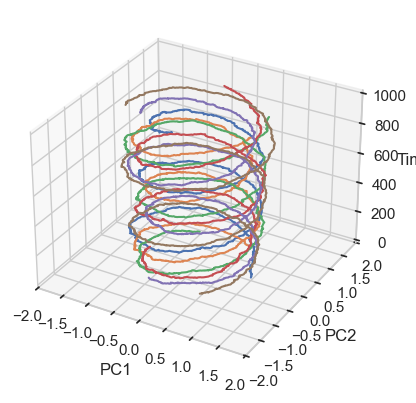

In [275]:
ax = plt.figure().add_subplot(projection='3d')

for i in range(c):
    ax.plot(data[i, 0, :], data[i, 1, :], range(t))

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Time')



In [276]:
new_data = transformation_to_n_dim(data, d, to_d)
new_data.shape

(6, 10, 1000)

In [277]:
new_data[0, :, 2]

array([0.98820915, 0.04793886, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [278]:
rotated = rotation(new_data)

In [279]:
rotated.shape

(6, 10, 1000)

In [280]:
rotated[0, :, 2]

array([-0.47638535, -0.19875751,  0.33884087,  0.31940087, -0.14112141,
        0.27720773, -0.20017173,  0.37277818,  0.11970911, -0.45327244])

Text(0.5, 0, 'Time')

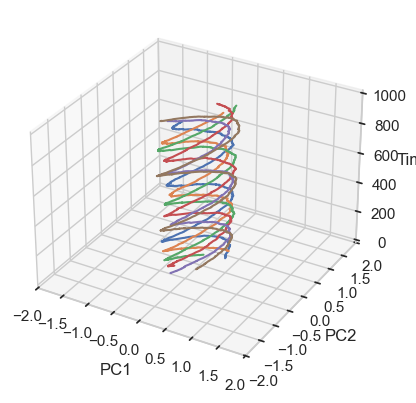

In [281]:
ax = plt.figure().add_subplot(projection='3d')

for i in range(c):
    ax.plot(rotated[i, 3, :], rotated[i, 2, :], range(t))

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Time')


Text(0.5, 0, 'Time')

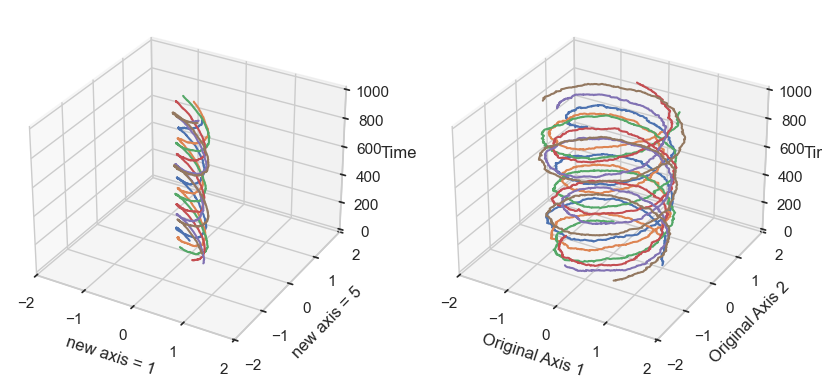

In [282]:
rotated_axis_a = 1
rotated_axis_b = 5

fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'})

# ax[0] = plt.figure().add_subplot(projection='3d')

for i in range(c):
    ax[0].plot(rotated[i, rotated_axis_a, :], rotated[i, rotated_axis_b, :], range(t))

ax[0].set_xlim([-2, 2])
ax[0].set_ylim([-2, 2])
ax[0].set_xlabel('new axis = ' + str(rotated_axis_a))
ax[0].set_ylabel('new axis = ' + str(rotated_axis_b))
ax[0].set_zlabel('Time')

# ax[1] = plt.figure().add_subplot(projection='3d')
for i in range(c):
    ax[1].plot(data[i, 0, :], data[i, 1, :], range(t))

ax[1].set_xlim([-2, 2])
ax[1].set_ylim([-2, 2])
ax[1].set_xlabel('Original Axis 1')
ax[1].set_ylabel('Original Axis 2')
ax[1].set_zlabel('Time')


Text(0.5, 0, 'Original axis 1-2')

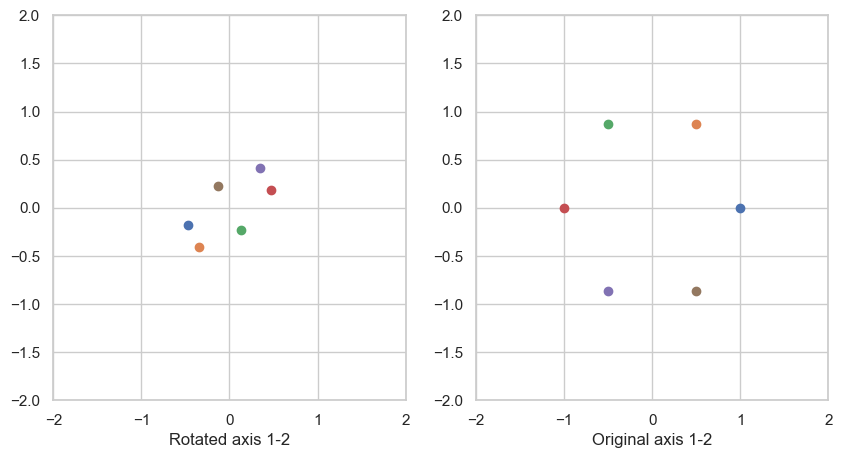

In [283]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i in range(c):
    ax[0].scatter(rotated[i, 0, 0], rotated[i, 1, 0])
    ax[1].scatter(data[i, 0, 0], data[i, 1, 0])

ax[0].set_xlim([-2, 2])
ax[0].set_ylim([-2, 2])
ax[0].set_xlabel('Rotated axis 1-2')

ax[1].set_xlim([-2, 2])
ax[1].set_ylim([-2, 2])
ax[1].set_xlabel('Original axis 1-2')

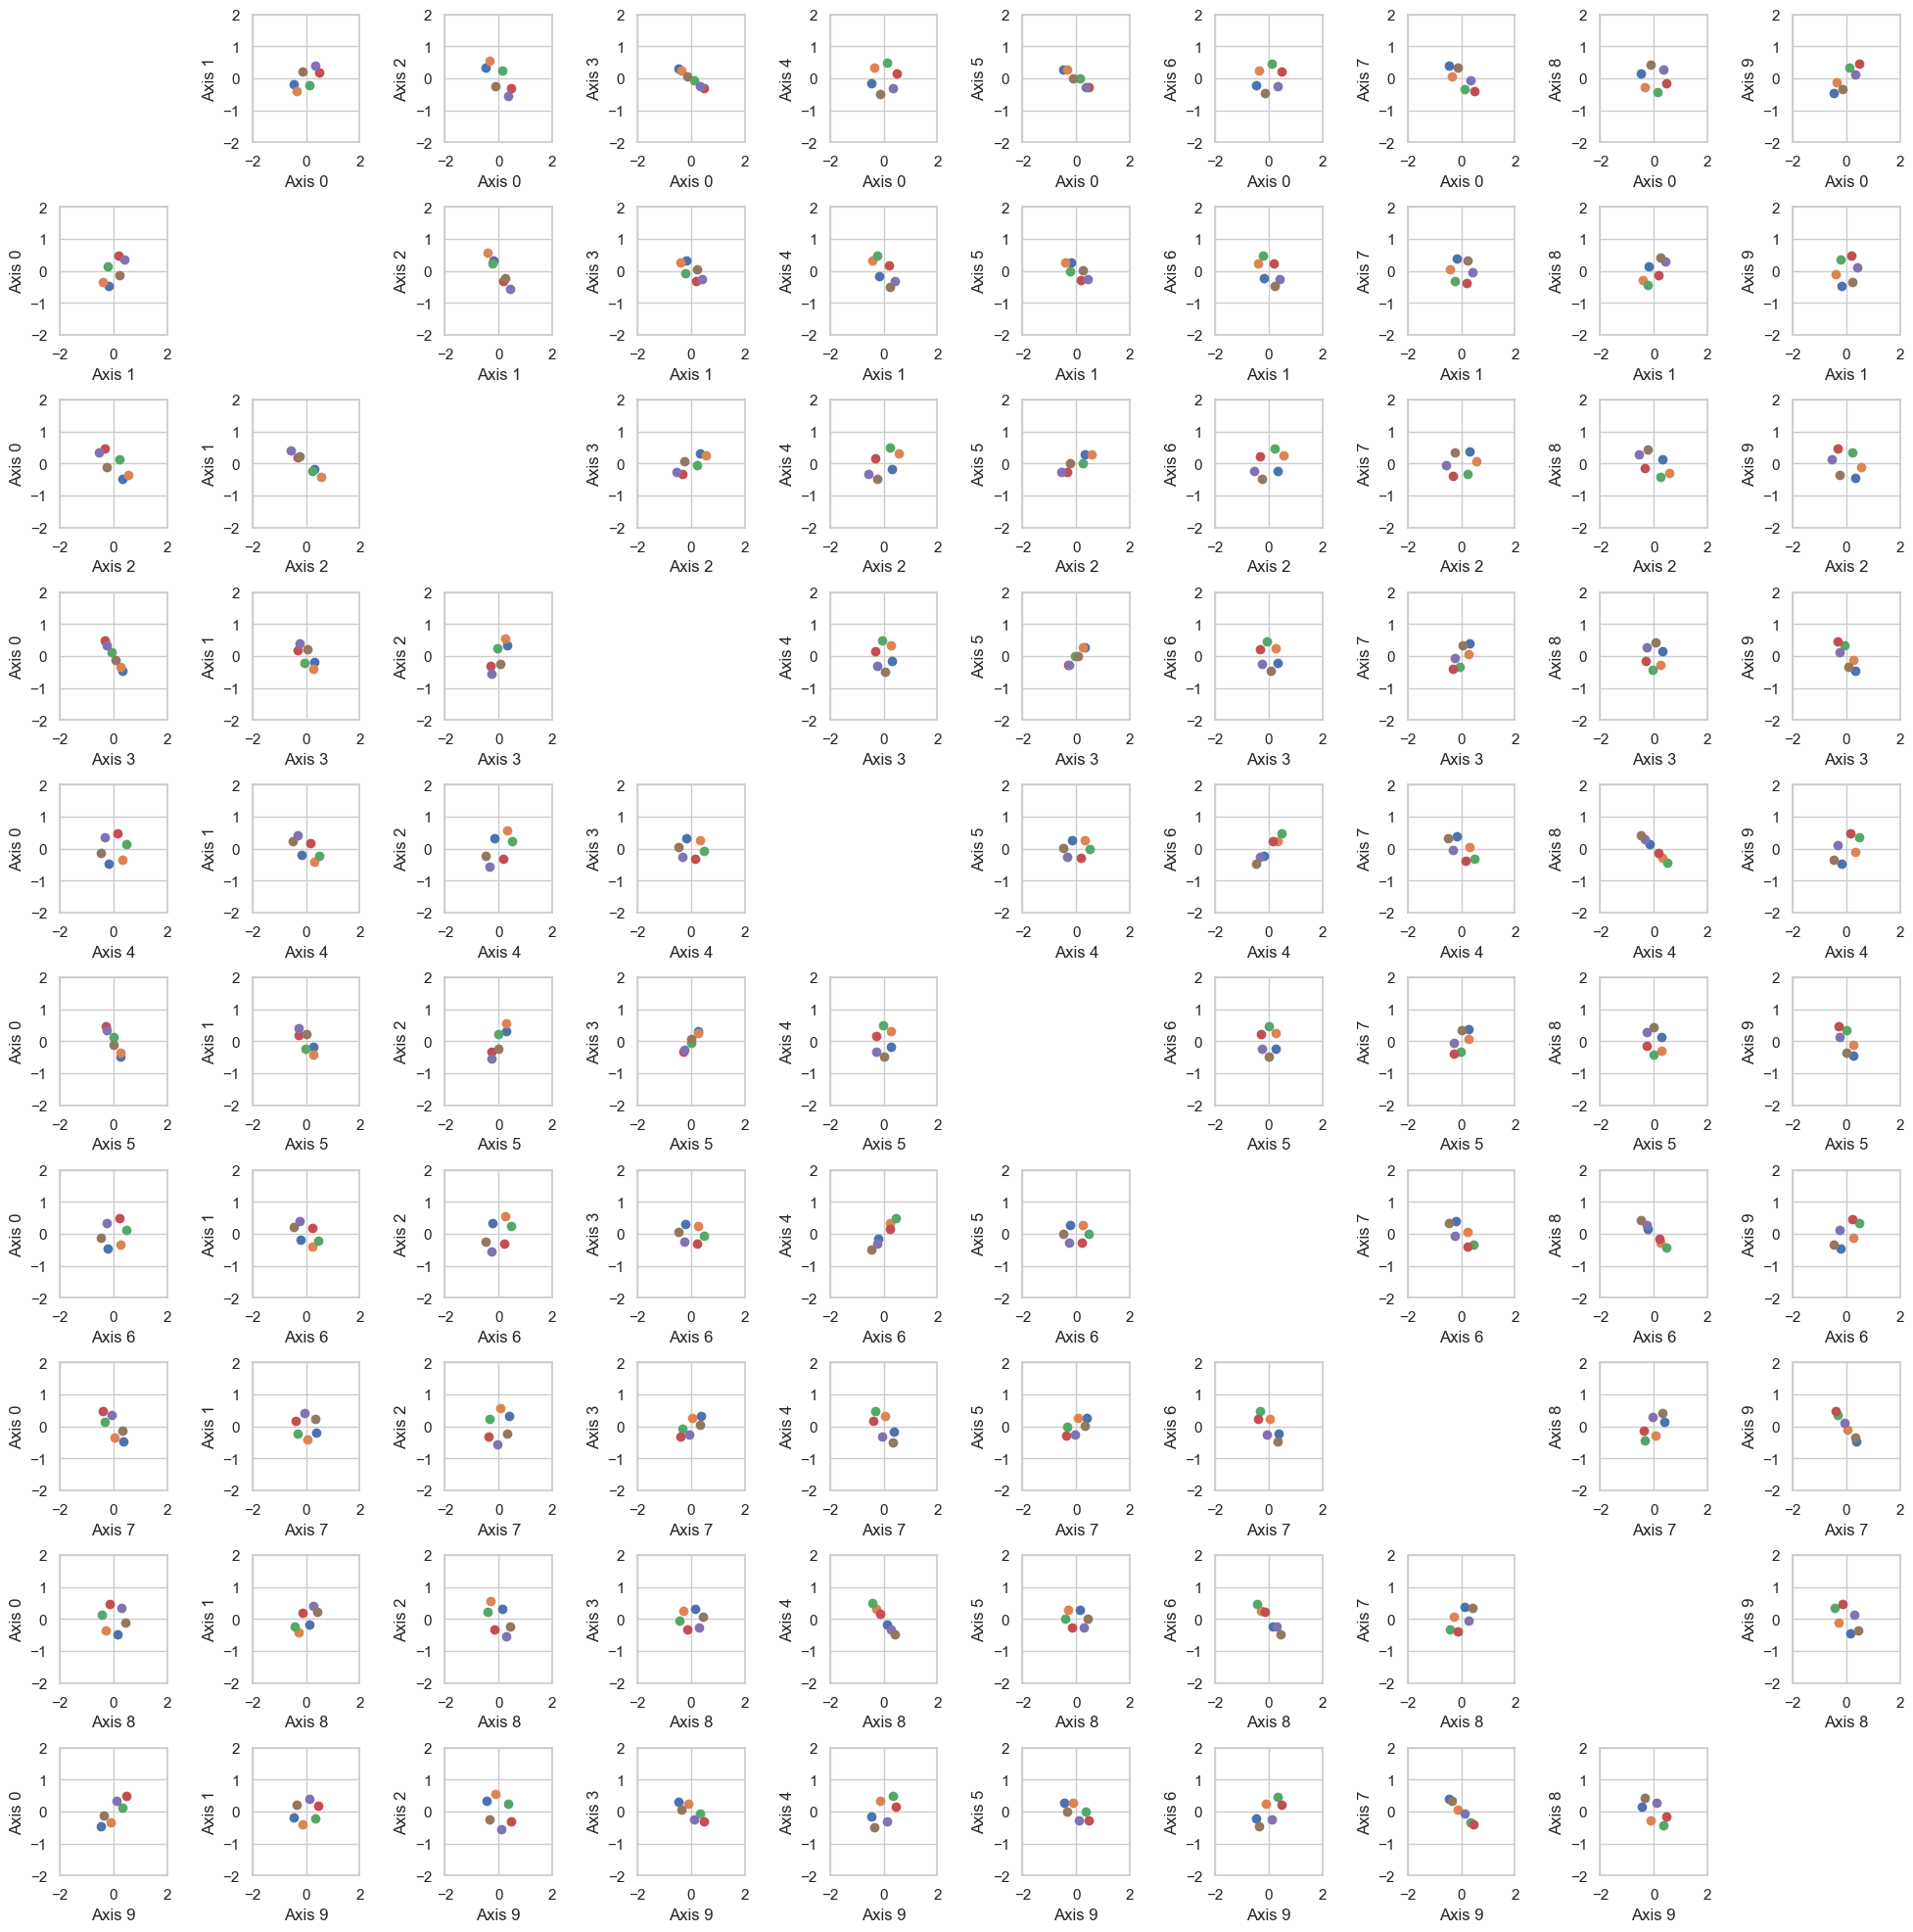

In [284]:
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
fig.tight_layout(pad=2.0)


for i in range(10):
    for j in range(10):
        for k in range(6):
            if i != j:
                ax[i, j].scatter(rotated[k, i, 0], rotated[k, j, 0])
                ax[i, j].set_xlim([-2, 2])
                ax[i, j].set_ylim([-2, 2])
                ax[i, j].set_xlabel(f'Axis {i}')
                ax[i, j].set_ylabel(f'Axis {j}')
            else:
                ax[i, j].axis('off')  # Turn off the diagonal subplots

plt.show()

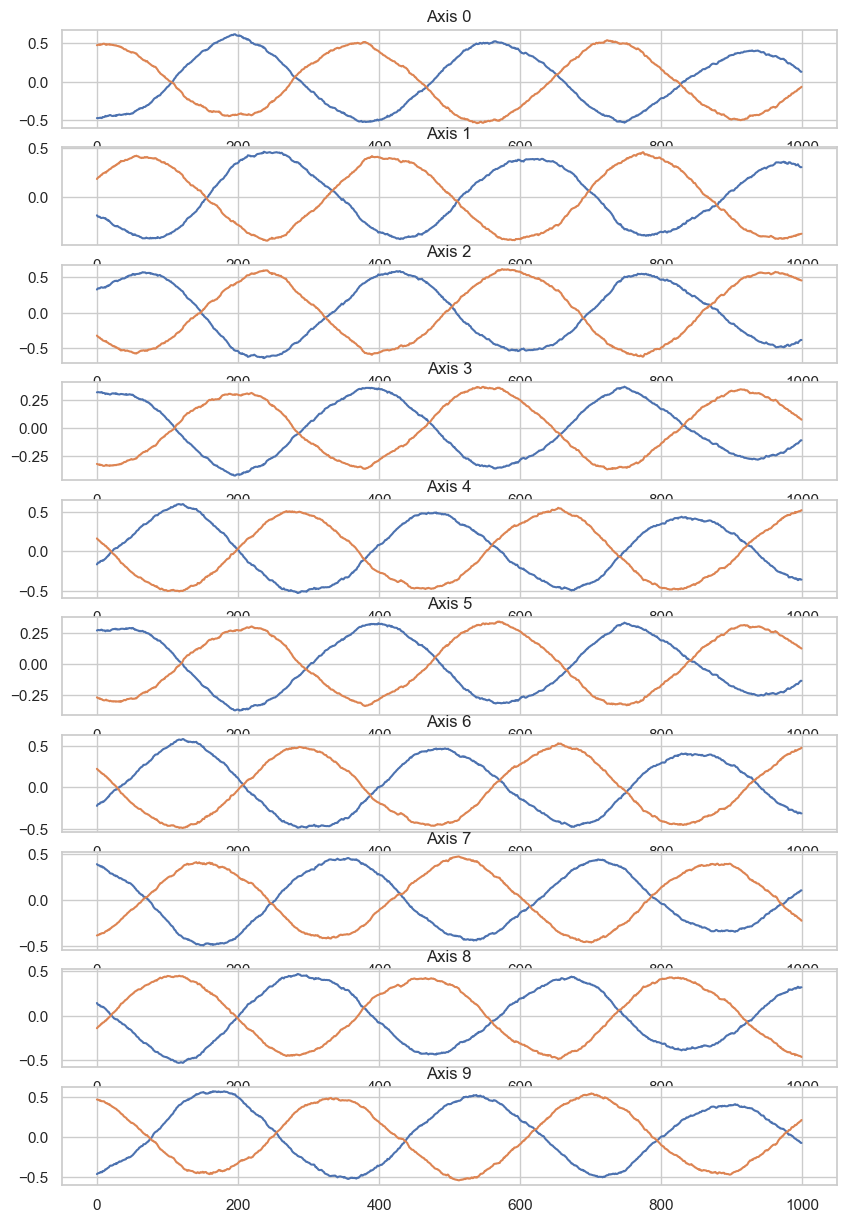

In [285]:
fig, ax = plt.subplots(10, 1, figsize=(10, 15))
for i in range(10):
    ax[i].plot(rotated[0, i, :])
    ax[i].plot(rotated[3, i, :])
    ax[i].set_title(f'Axis {i}')

In [286]:
c

6

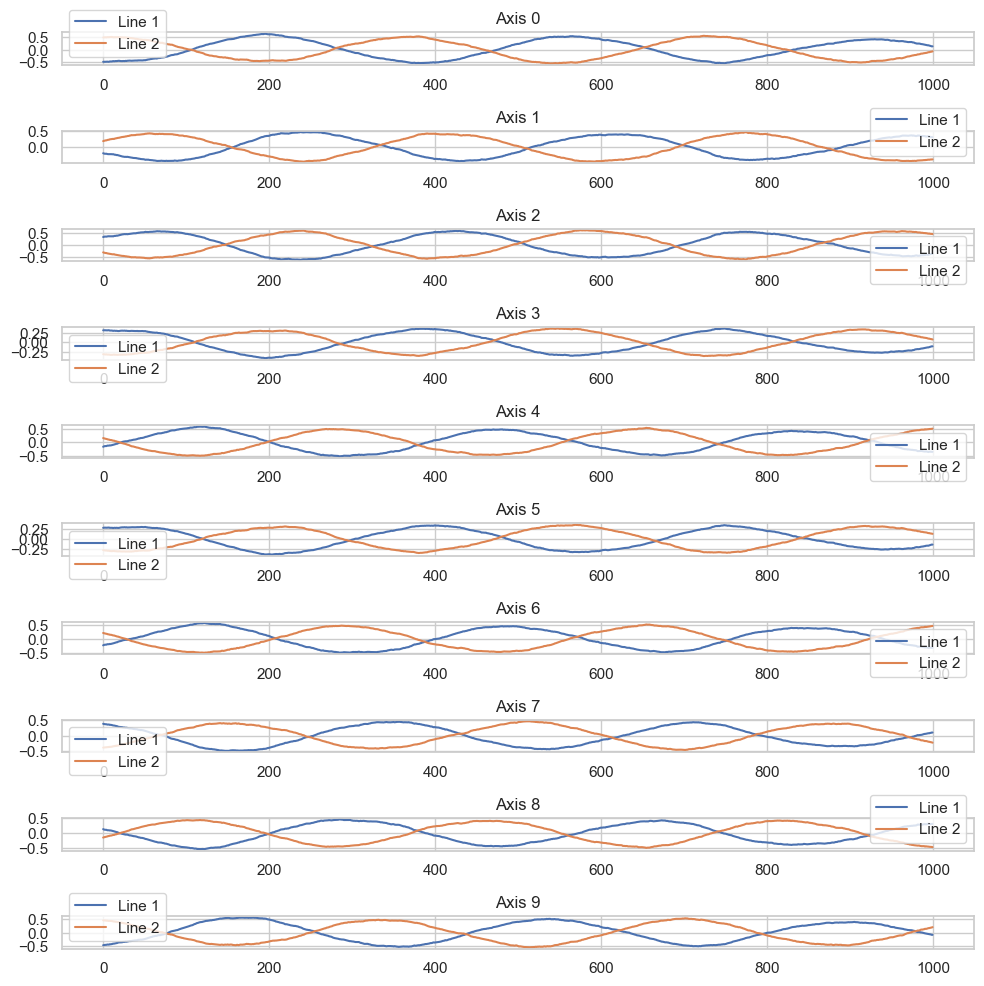

In [287]:
sns.set(style="whitegrid")

# Create the subplots
fig, axes = plt.subplots(10, 1, figsize=(10, 10))  # Adjusted the height for better spacing

# Plot the data
for i in range(10):
    sns.lineplot(data=rotated[0, i, :], ax=axes[i], label='Line 1')
    sns.lineplot(data=rotated[3, i, :], ax=axes[i], label='Line 2')
    axes[i].set_title(f'Axis {i}')

# Adjust layout
plt.tight_layout()
plt.show()

In [288]:
rotated.shape

(6, 10, 1000)

In [289]:
np.save('../../Data/rotated.npy', rotated)

In [295]:
def create_spiral_rotation_in_nd(c, d, t, theta, to_d):
    data = np.zeros((c, d, t))
    for i in range(c):
        data[i, :, 0] = find_coords(theta, i)

    for i in range(t):
        if i == 0:
            continue
        for j in range(c):
            data[j, :, i] = rotation_matrix(data[j, :, i - 1], 1) + np.random.normal(
                0, 0.01, (1, d)
            )

    new_data = transformation_to_n_dim(data, d, to_d)
    rotated = rotation(new_data)

    return rotated

In [297]:
new_rotation = create_spiral_rotation_in_nd(c, d, t, theta, to_d)
new_rotation.shape

(6, 10, 1000)

In [298]:
new_rotation[0, 0, :]

array([ 0.48348327,  0.47724957,  0.47138595,  0.47027044,  0.47524382,
        0.47037781,  0.46429581,  0.45636426,  0.4425625 ,  0.43914467,
        0.4338347 ,  0.42159857,  0.41581876,  0.41441849,  0.40867435,
        0.40047336,  0.39456122,  0.38914303,  0.38496097,  0.37825723,
        0.37200666,  0.36360734,  0.36117645,  0.35244581,  0.34809872,
        0.3408666 ,  0.33126721,  0.31925173,  0.31444107,  0.30544421,
        0.29380504,  0.28279009,  0.281002  ,  0.26924296,  0.26163451,
        0.26025355,  0.24724528,  0.23658657,  0.23215126,  0.22405913,
        0.22045435,  0.21369577,  0.20499474,  0.19777085,  0.19183653,
        0.17358316,  0.1615942 ,  0.15090319,  0.14044893,  0.12902508,
        0.11442985,  0.10436702,  0.09312041,  0.08152159,  0.0669492 ,
        0.05807345,  0.04265431,  0.0388236 ,  0.03698445,  0.03170233,
        0.01227967,  0.00467377, -0.01674291, -0.02358633, -0.0244158 ,
       -0.03382355, -0.04490745, -0.04711108, -0.06010146, -0.05

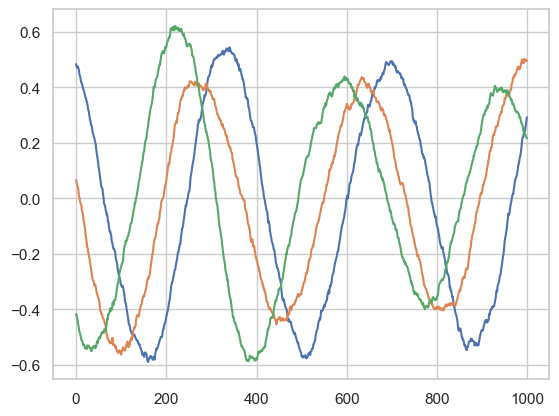

In [304]:
plt.plot(np.arange((new_rotation.shape[2])) , new_rotation[0, 0, :])
plt.plot(np.arange((new_rotation.shape[2])) , new_rotation[1, 0, :])
plt.plot(np.arange((new_rotation.shape[2])) , new_rotation[2, 0, :])